In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from partition_decode.plots import continuous_pairplot
from scipy.stats import spearmanr, kendalltau

# Forest

In [175]:
# Read
df = pd.read_csv('./results/xor_forest_results.csv')

# Define headers
train_error = 'train_mse'
test_error = 'test_mse'

# Set to floats
df.loc[df['max_depth'] == 'None', 'max_depth'] = '32' # set max depth
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except:
        pass

# Create new metrics/columns
df['generalization_gap'] = df[train_error] - df[test_error]
df['frac_activated'] = df['n_regions'] / df['n_train_samples']

# Average across reps
# df = df.groupby(
#     ['model', 'n_train_samples', 'n_estimators', 'max_depth'],
#     as_index=False
# ).mean()

In [176]:
df.head(5)

,model,rep,n_train_samples,n_estimators,bootstrap,max_depth,n_jobs,train_mse,test_mse,IRM_L1,...,IRM_h*,ACTS_h*,entropy,rows_mean_L1,rows_mean_L2,cols_mean_L1,cols_mean_L2,n_total_leaves,generalization_gap,frac_activated
0,forest,0.0,500.0,1.0,0.0,2.0,-1.0,0.245987,0.252719,500.0,...,3.0,3.0,2983.258644,1.0,0.943275,166.666667,7.453560,3.0,-0.006732,0.006
1,forest,0.0,500.0,1.0,0.0,3.0,-1.0,0.225002,0.240181,500.0,...,8.0,8.0,2545.442537,1.0,0.635962,62.500000,2.795085,8.0,-0.015179,0.016
2,forest,0.0,500.0,1.0,0.0,4.0,-1.0,0.220252,0.242133,500.0,...,12.0,12.0,2492.380708,1.0,0.625364,41.666667,1.863390,12.0,-0.021880,0.024
3,forest,0.0,500.0,1.0,0.0,6.0,-1.0,0.194296,0.236977,500.0,...,21.0,21.0,2403.724028,1.0,0.693553,23.809524,1.064794,21.0,-0.042680,0.042
4,forest,0.0,500.0,1.0,0.0,8.0,-1.0,0.123759,0.243046,500.0,...,47.0,47.0,1529.141910,1.0,0.263302,10.638298,0.475759,47.0,-0.119287,0.094


In [178]:
corr_vars = [
    'generalization_gap',
    'n_total_leaves', 'max_depth', 'n_estimators',
    'IRM_L1', 'IRM_L2', 'n_regions', 'ACTS_L2',
    'IRM_h*', 'ACTS_h*', 'entropy',
    'rows_mean_L1', 'rows_mean_L2', 'cols_mean_L1', 'cols_mean_L2',
]
corr_df = df[corr_vars].corr('kendall')
display(corr_df)
# corr_df.to_csv('./results/rf_spearman_corrs.csv')

,generalization_gap,n_total_leaves,max_depth,n_estimators,IRM_L1,IRM_L2,n_regions,ACTS_L2,IRM_h*,ACTS_h*,entropy,rows_mean_L1,rows_mean_L2,cols_mean_L1,cols_mean_L2
generalization_gap,1.000000,-0.793432,-0.985131,0.051937,0.069450,0.696324,-0.861991,0.867281,-0.893505,-0.861991,0.381092,0.008268,0.813210,0.990194,0.990194
n_total_leaves,-0.793432,1.000000,0.827313,0.531409,0.507460,-0.181727,0.978143,-0.965063,0.967064,0.978143,0.214011,0.566158,-0.362805,-0.814360,-0.814360
max_depth,-0.985131,0.827313,1.000000,0.000000,-0.022395,-0.659918,0.895133,-0.894561,0.921189,0.895133,-0.329283,0.045666,-0.790075,-0.992990,-0.992990
n_estimators,0.051937,0.531409,0.000000,1.000000,0.993511,0.703557,0.393715,-0.357897,0.337634,0.393715,0.927892,0.994124,0.549054,0.015713,0.015713
IRM_L1,0.069450,0.507460,-0.022395,0.993511,1.000000,0.709423,0.366454,-0.328353,0.309170,0.366454,0.924088,0.987129,0.562137,0.037547,0.037547
IRM_L2,0.696324,-0.181727,-0.659918,0.703557,0.709423,1.000000,-0.319467,0.359216,-0.378214,-0.319467,0.903370,0.663049,0.970286,0.680637,0.680637
n_regions,-0.861991,0.978143,0.895133,0.393715,0.366454,-0.319467,1.000000,-0.987470,0.995295,1.000000,0.071435,0.429720,-0.490975,-0.883789,-0.883789
ACTS_L2,0.867281,-0.965063,-0.894561,-0.357897,-0.328353,0.359216,-0.987470,1.000000,-0.988742,-0.987470,-0.031899,-0.395641,0.524062,0.888430,0.888430
IRM_h*,-0.893505,0.967064,0.921189,0.337634,0.309170,-0.378214,0.995295,-0.988742,1.000000,0.995295,0.011282,0.376802,-0.547325,-0.912150,-0.912150
ACTS_h*,-0.861991,0.978143,0.895133,0.393715,0.366454,-0.319467,1.000000,-0.987470,0.995295,1.000000,0.071435,0.429720,-0.490975,-0.883789,-0.883789


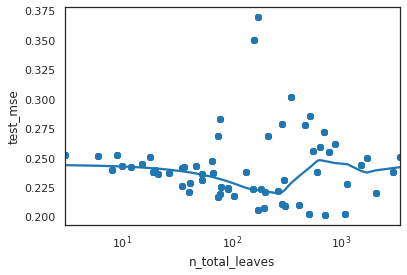

In [180]:
sns.set_style('white')
sns.set_context('notebook')
sns.regplot(data=df, x='n_total_leaves', y=test_error, lowess=True)
plt.xscale('log')
plt.show()

## Plot all, colored by generalization gap

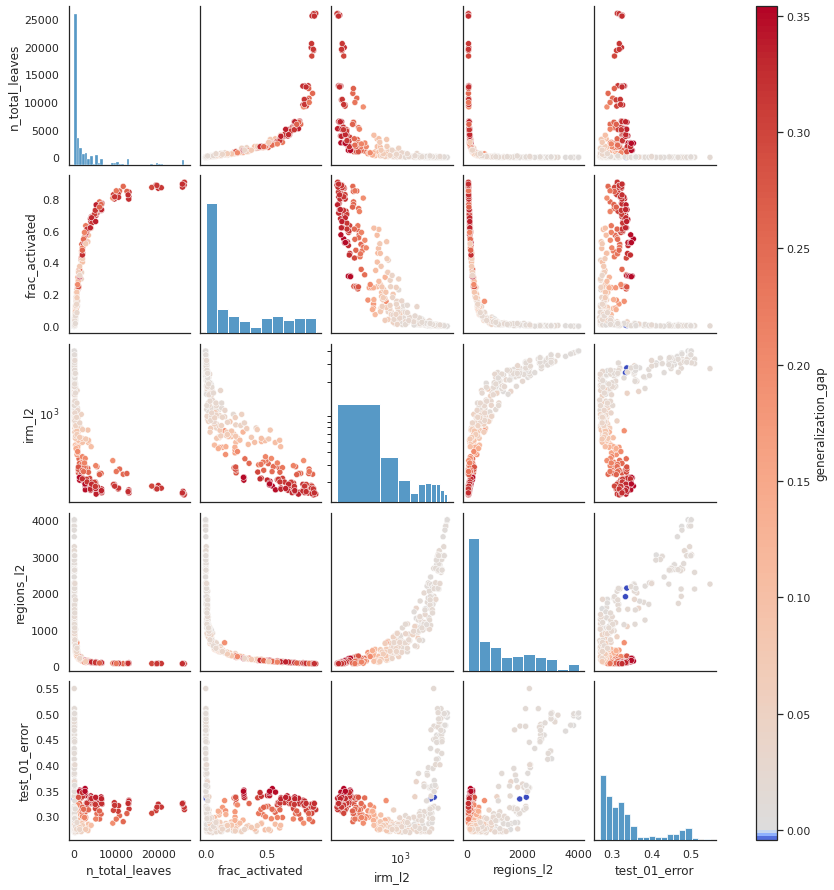

In [28]:
sns.set_context('notebook')
hue = 'generalization_gap'
variables = [
    # 'n_estimators', 'max_depth',
    'n_total_leaves', 'frac_activated',
    'IRM_L1', 'IRM_L2', 'n_regions', 'ACTS_L2',
    'IRM_h*', 'ACTS_h*', 'entropy',
    # 'rows_mean_L1', 'rows_mean_L2',
    'cols_mean_L1', 'cols_mean_L2',
    train_error, test_error
]
g = continuous_pairplot(
    df, vars=variables,
    hue=hue,
)
g.axes[2, 0].set_yscale('log')
g.axes[0, 2].set_xscale('log')
plt.savefig('./figures/rf_continuous_pairplot.pdf')
plt.show()

## Dynamics of complexity measures

IRM_L1
##################################################


/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


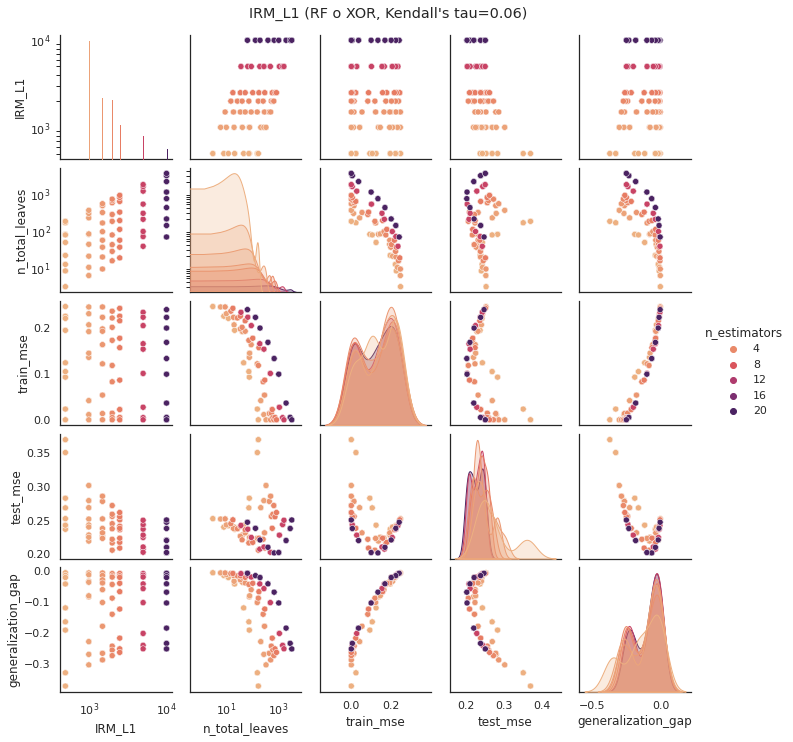

IRM_L2
##################################################


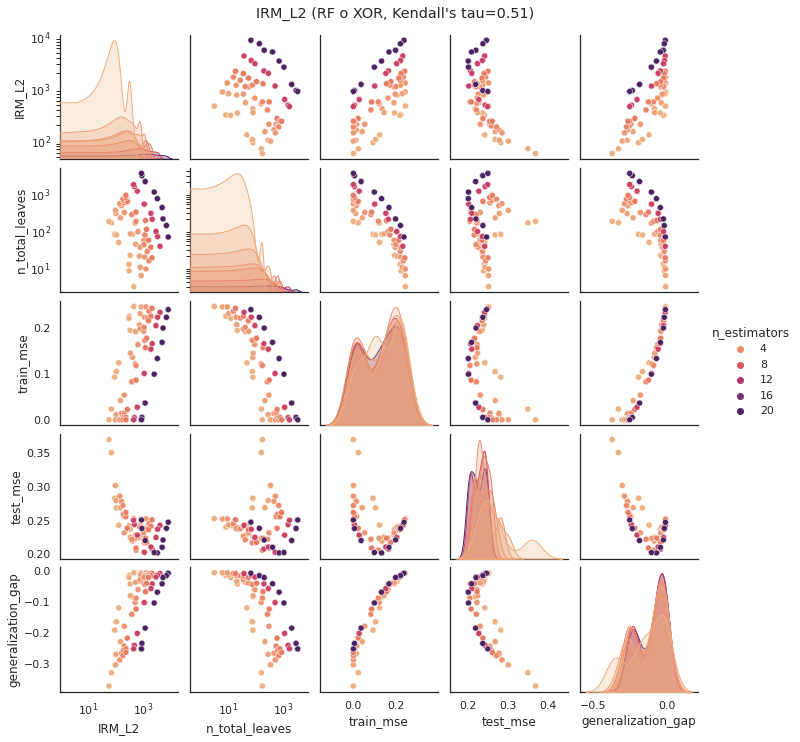

n_regions
##################################################


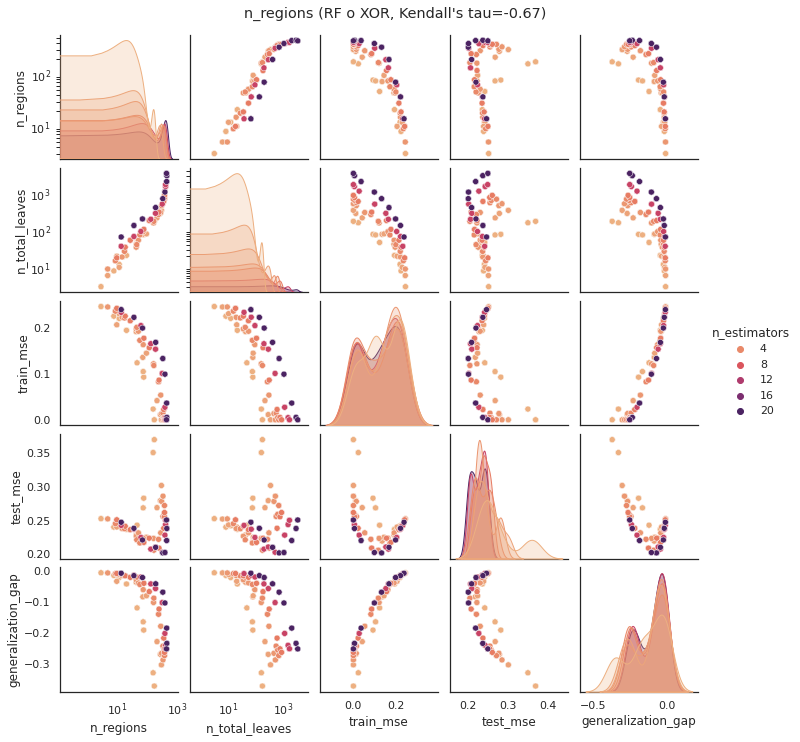

ACTS_L2
##################################################


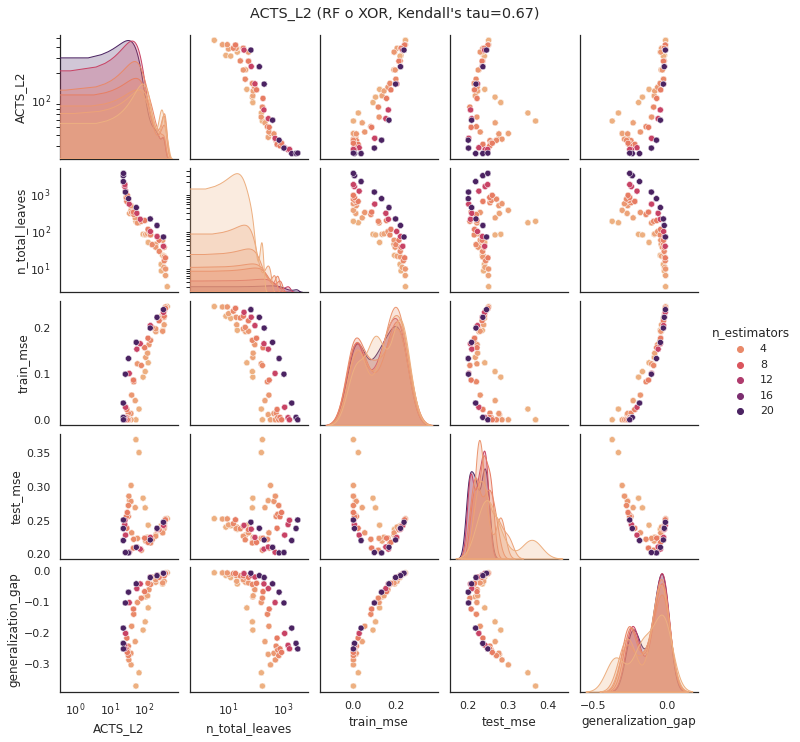

IRM_h*
##################################################


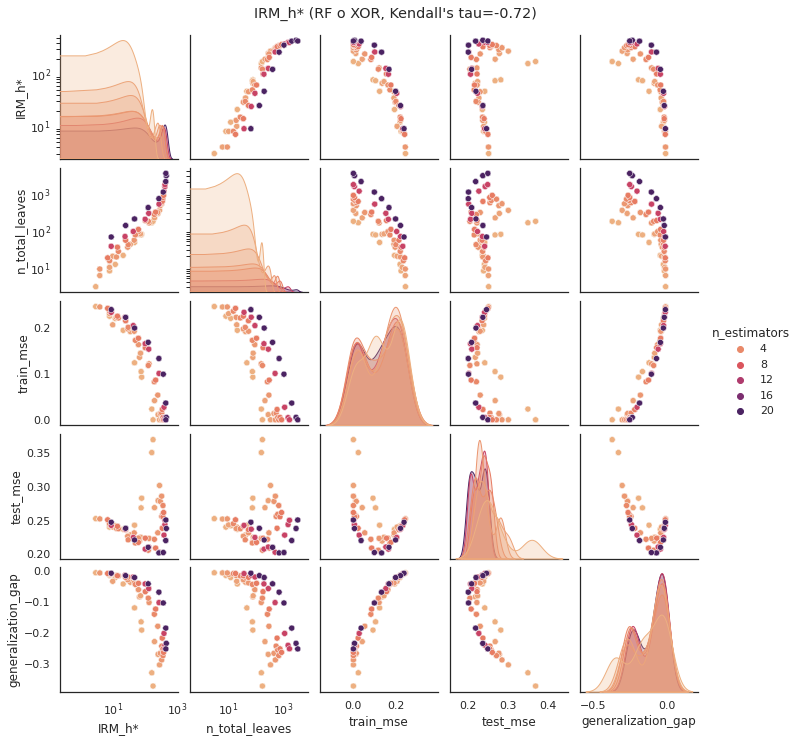

ACTS_h*
##################################################


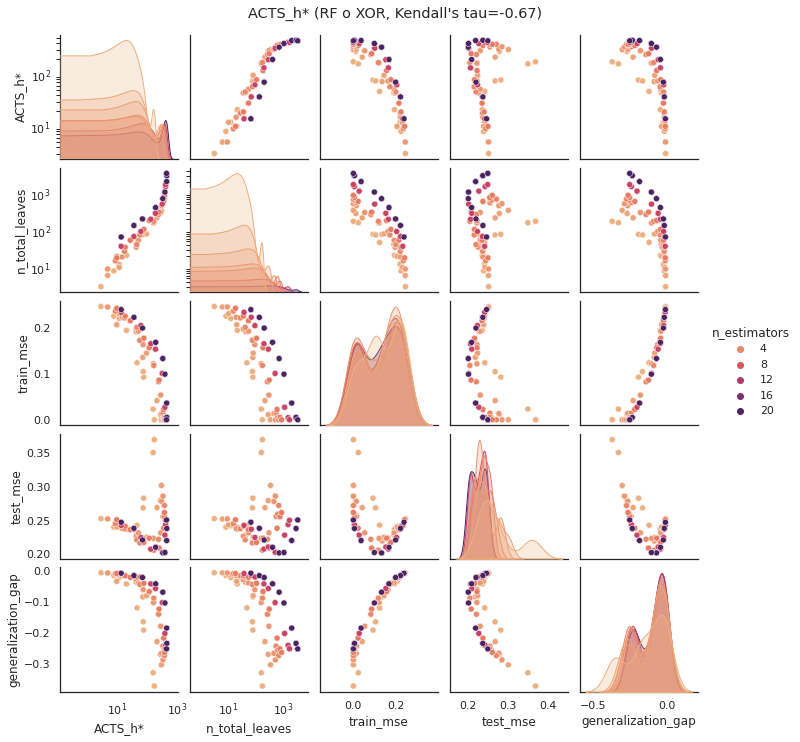

rows_mean_L1
##################################################


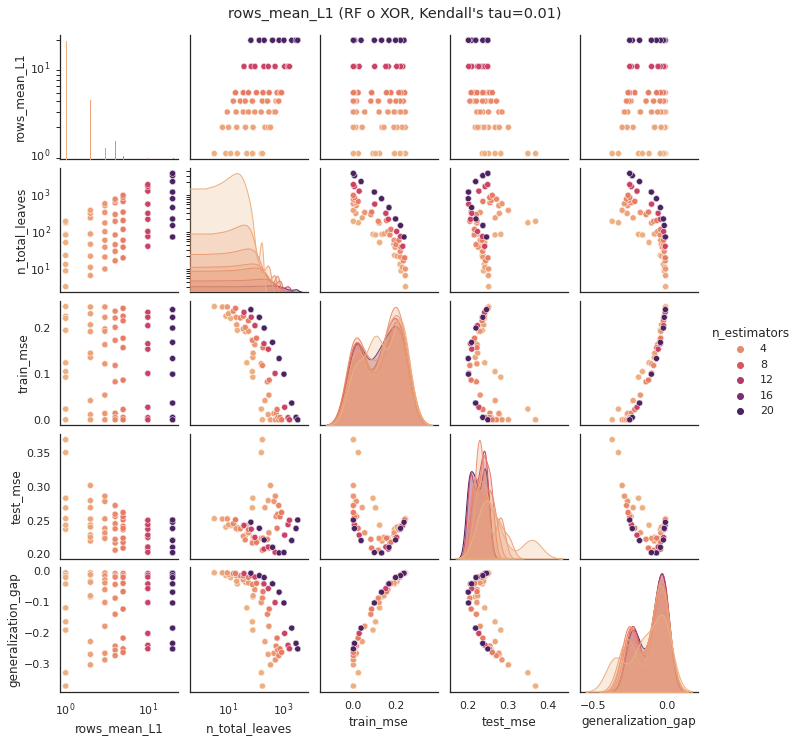

rows_mean_L2
##################################################


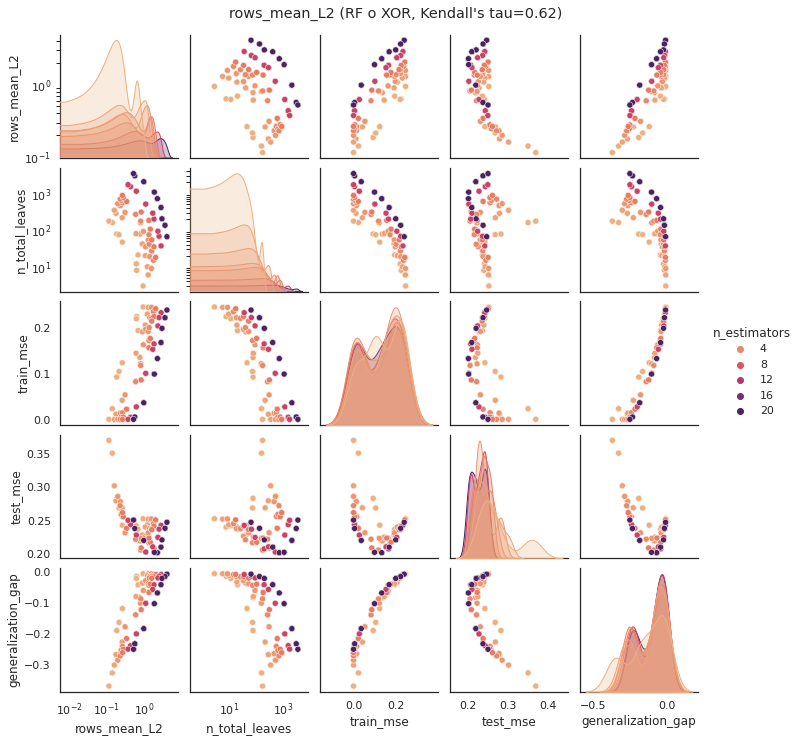

cols_mean_L1
##################################################


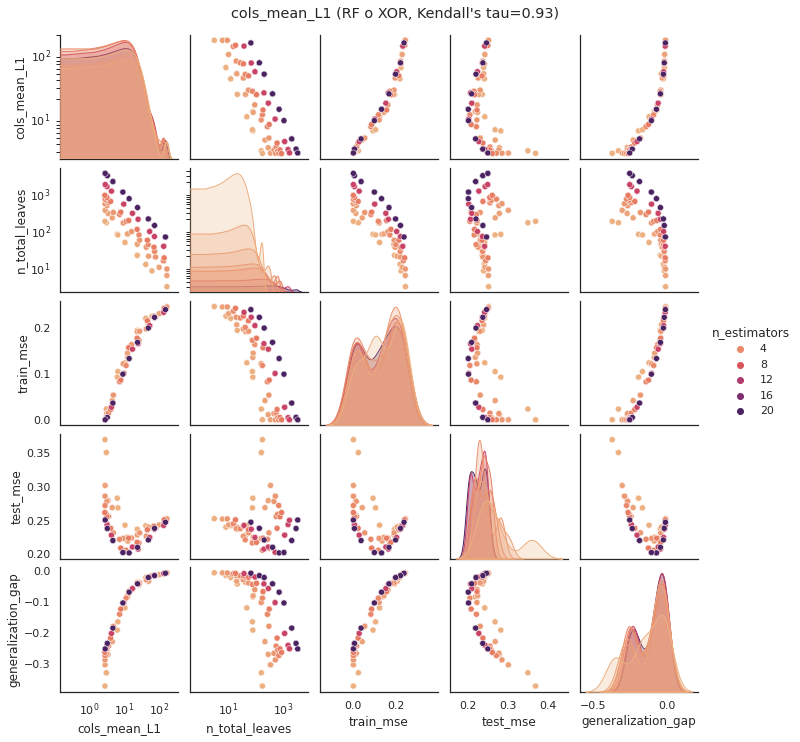

cols_mean_L2
##################################################


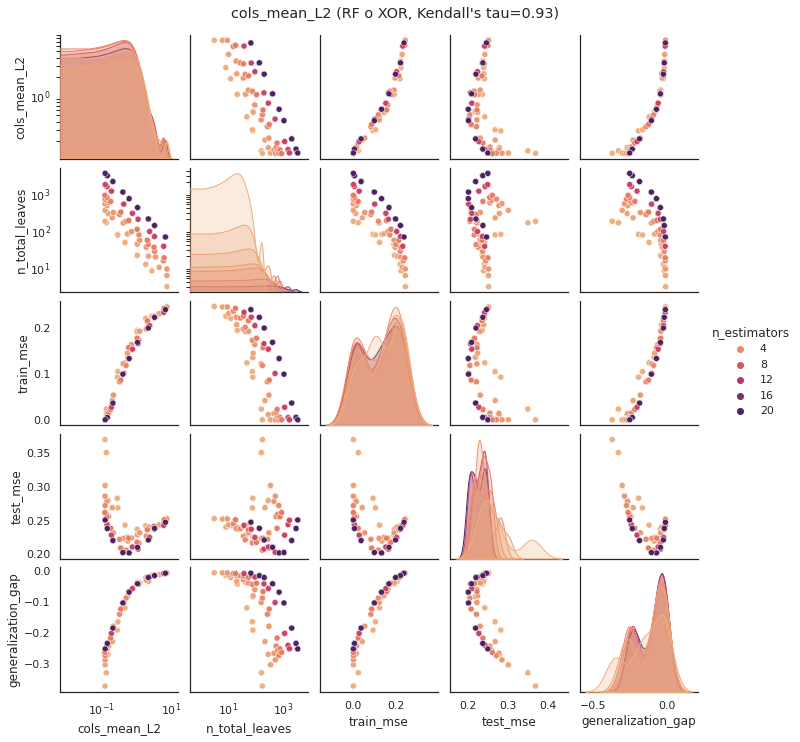

In [198]:
metrics = [
    'IRM_L1', 'IRM_L2', 'n_regions', 'ACTS_L2',
    'IRM_h*', 'ACTS_h*', # 'entropy',
    'rows_mean_L1', 'rows_mean_L2',
    'cols_mean_L1', 'cols_mean_L2',
]
hue = 'n_estimators'
for metric in metrics:
    print(metric)
    print('#'*50)
    corr, _ = kendalltau(df[metric], df['generalization_gap'])
    variables = [
        metric, 'n_total_leaves', train_error, test_error, 'generalization_gap'
    ]
    g = sns.pairplot(
        df, vars=variables,
        hue=hue,
        palette='flare',
        height=2,
    )
    for ax in [0, 1]:
        g.axes[ax, 0].set_yscale('log')
        g.axes[0, ax].set_xscale('log')
    plt.suptitle(metric + f' (RF o XOR, Kendall\'s tau={corr:.2f})', y=1.02)
    # plt.savefig(f'./figures/rf_{metric}_pairplot.pdf')
    plt.show()

# Network

In [199]:
# Read
df = pd.read_csv('./results/xor_network_results.csv')

In [200]:
train_error = 'train_mse'
test_error = 'test_mse'

# Set to floats
for col in df.columns:
    if col in ['hidden_layer_dims']:
        continue
    try:
        df[col] = df[col].astype(float)
    except:
        pass

# Create new metrics/columns
df['generalization_gap'] = df[test_error] - df[train_error]

# Average across reps
# df = df.groupby(
#     ['model', 'n_train_samples', 'hidden_layer_dims'],
#     as_index=False
# ).mean()

In [201]:
df.head(5)

,model,rep,n_train_samples,hidden_layer_dims,n_epochs,learning_rate,batch_size,verbose,train_mse,test_mse,...,ACTS_h*,entropy,rows_mean_L1,rows_mean_L2,cols_mean_L1,cols_mean_L2,n_parameters,depth,width,generalization_gap
0,network,0.0,500.0,2,100.0,0.01,128.0,0.0,0.225309,0.223555,...,3.0,1564.243088,0.620,0.439509,155.0,8.803408,12.0,1.0,2.0,-0.001754
1,network,0.0,500.0,10,100.0,0.01,128.0,0.0,0.189281,0.186473,...,40.0,14919.777147,4.640,1.576038,232.0,10.787956,52.0,1.0,10.0,-0.002807
2,network,1.0,500.0,2,100.0,0.01,128.0,0.0,0.217244,0.220918,...,4.0,1581.006967,0.610,0.431337,152.5,10.851267,12.0,1.0,2.0,0.003674
3,network,1.0,500.0,10,100.0,0.01,128.0,0.0,0.188577,0.188337,...,32.0,15900.224955,4.800,1.593331,240.0,11.464729,52.0,1.0,10.0,-0.000240
4,network,2.0,500.0,2,100.0,0.01,128.0,0.0,0.238808,0.241698,...,3.0,1933.558817,0.686,0.487889,171.5,12.737739,12.0,1.0,2.0,0.002890


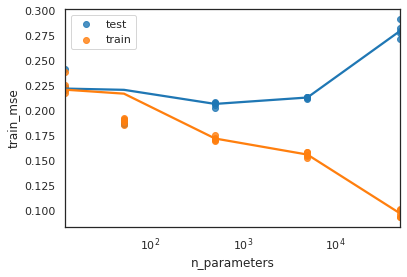

In [202]:
sns.set_style('white')
sns.set_context('notebook')

fig, ax = plt.subplots(1, 1, sharex=True)

sns.regplot(data=df, x='n_parameters', y=test_error, lowess=True, ax=ax, label='test')
sns.regplot(data=df, x='n_parameters', y=train_error, lowess=True, ax=ax, label='train')
plt.xscale('log')
plt.legend()
plt.show()

In [204]:
corr_vars = [
    'generalization_gap',
    'n_parameters', 'depth', 'width', 'n_epochs',
    'IRM_L1', 'IRM_L2', 'n_regions', 'ACTS_L2',
    'IRM_h*', 'ACTS_h*', 'entropy',
    'rows_mean_L1', 'rows_mean_L2',
    'cols_mean_L1', 'cols_mean_L2',
]
corr_df = df[corr_vars].corr('spearman')
display(corr_df)
# corr_df.to_csv('./results/dn_spearman_corrs.csv')

,generalization_gap,n_parameters,depth,width,n_epochs,IRM_L1,IRM_L2,n_regions,ACTS_L2,IRM_h*,ACTS_h*,entropy,rows_mean_L1,rows_mean_L2,cols_mean_L1,cols_mean_L2
generalization_gap,1.000000,0.898212,NaN,0.898212,0.930261,0.783077,0.786923,0.772815,-0.761538,0.783156,0.772815,0.786923,0.783077,0.597692,-0.840000,-0.876154
n_parameters,0.898212,1.000000,NaN,1.000000,0.948683,0.886445,0.882523,0.887470,-0.886445,0.886969,0.887470,0.882523,0.886445,0.702096,-0.686406,-0.909979
depth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
width,0.898212,1.000000,NaN,1.000000,0.948683,0.886445,0.882523,0.887470,-0.886445,0.886969,0.887470,0.882523,0.886445,0.702096,-0.686406,-0.909979
n_epochs,0.930261,0.948683,NaN,0.948683,1.000000,0.781419,0.775217,0.782322,-0.781419,0.779122,0.782322,0.775217,0.781419,0.632577,-0.723536,-0.905454
IRM_L1,0.783077,0.886445,NaN,0.886445,0.781419,1.000000,0.997692,0.973817,-0.968462,0.978366,0.973817,0.997692,1.000000,0.910000,-0.539231,-0.744615
IRM_L2,0.786923,0.882523,NaN,0.882523,0.775217,0.997692,1.000000,0.974587,-0.966154,0.979139,0.974587,1.000000,0.997692,0.912308,-0.540000,-0.736154
n_regions,0.772815,0.887470,NaN,0.887470,0.782322,0.973817,0.974587,1.000000,-0.983828,0.989752,1.000000,0.974587,0.973817,0.880247,-0.565268,-0.783597
ACTS_L2,-0.761538,-0.886445,NaN,-0.886445,-0.781419,-0.968462,-0.966154,-0.983828,1.000000,-0.983004,-0.983828,-0.966154,-0.968462,-0.880769,0.569231,0.808462
IRM_h*,0.783156,0.886969,NaN,0.886969,0.779122,0.978366,0.979139,0.989752,-0.983004,1.000000,0.989752,0.979139,0.978366,0.889072,-0.565140,-0.788568


IRM_L1
##################################################


/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


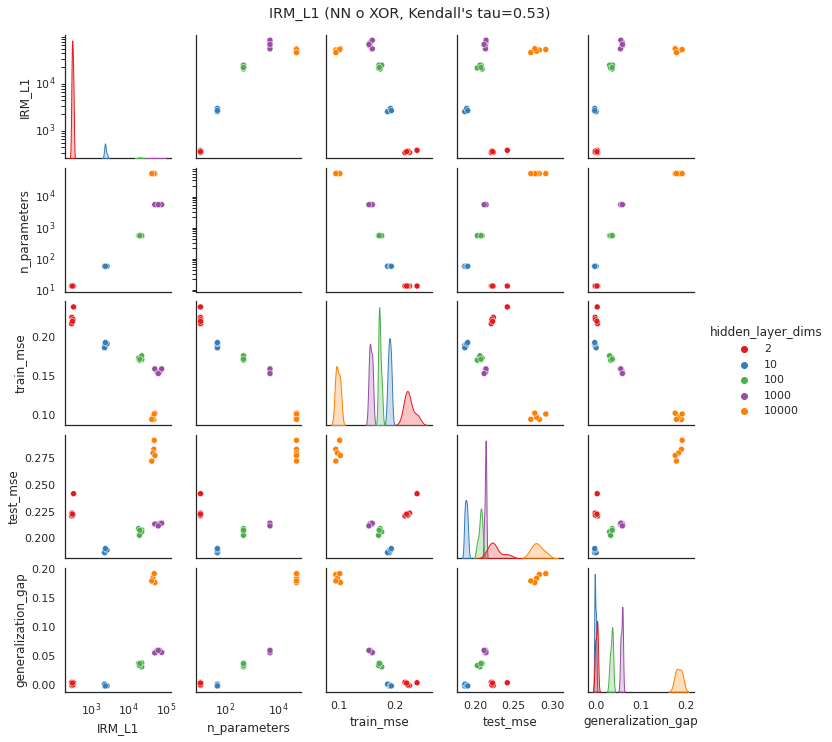

IRM_L2
##################################################


/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


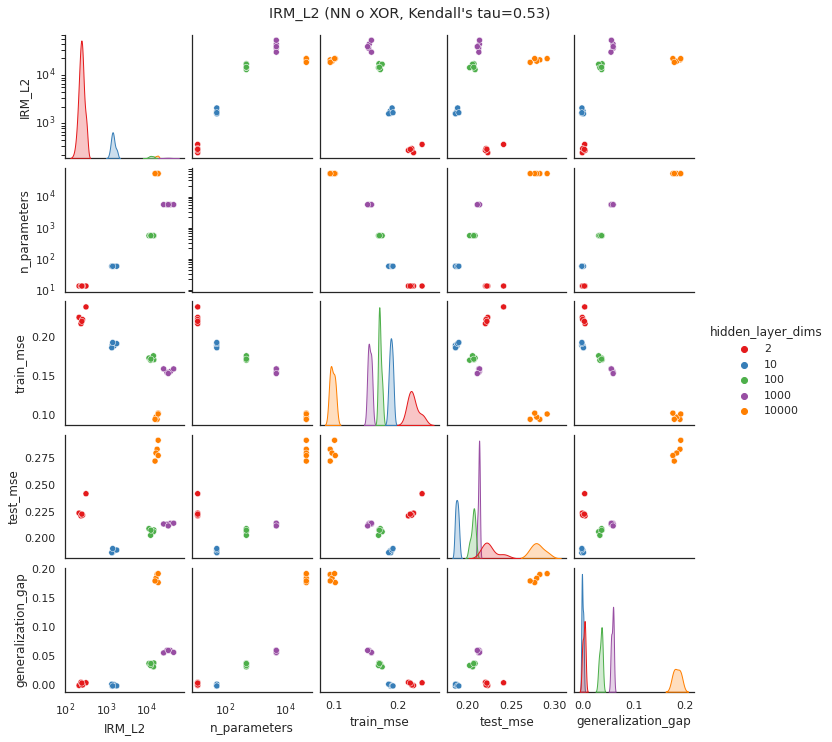

n_regions
##################################################


/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


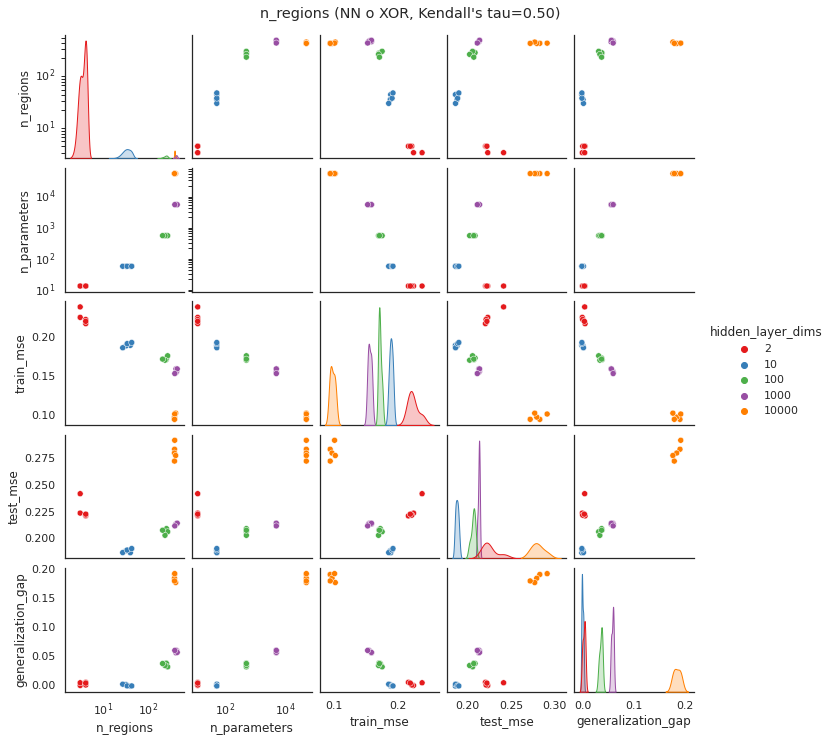

ACTS_L2
##################################################


/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


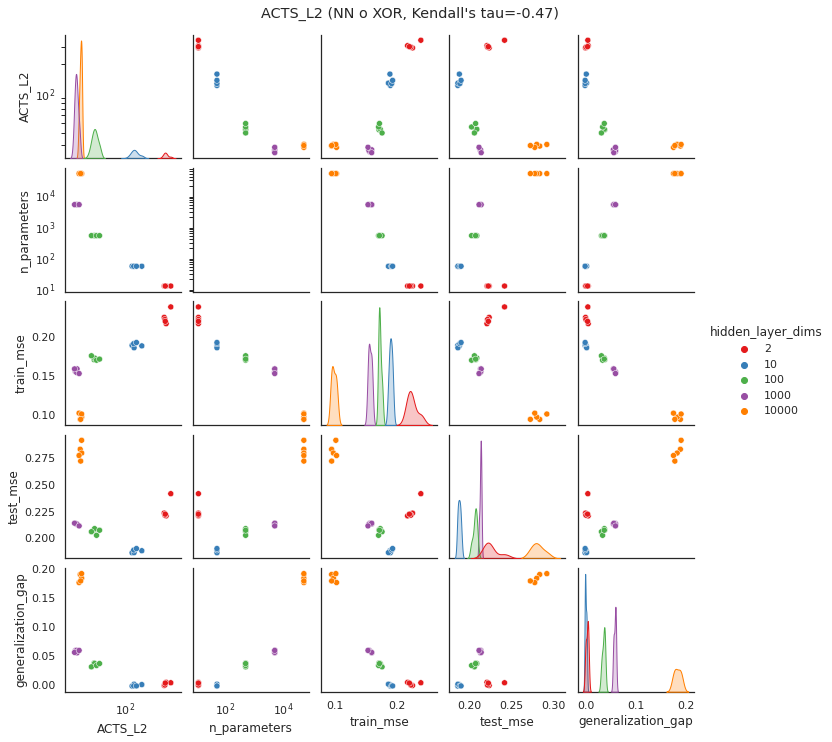

IRM_h*
##################################################


/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/

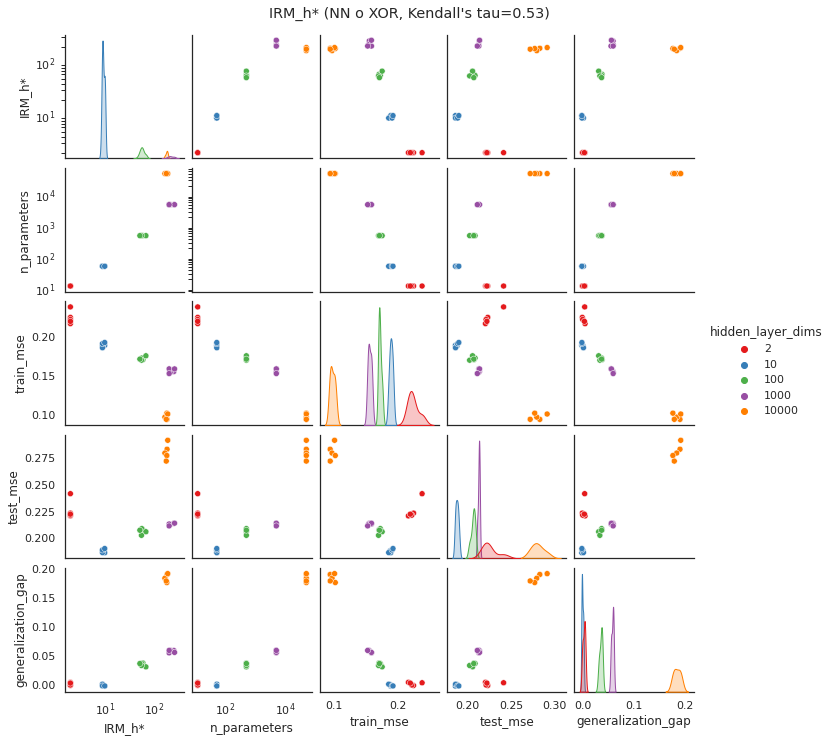

ACTS_h*
##################################################


/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


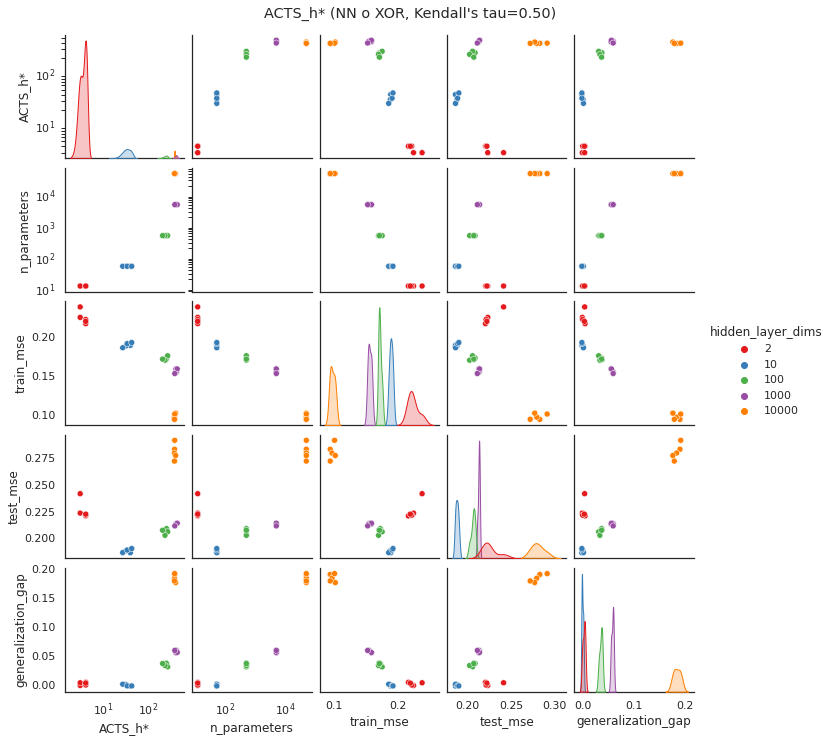

rows_mean_L1
##################################################


/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


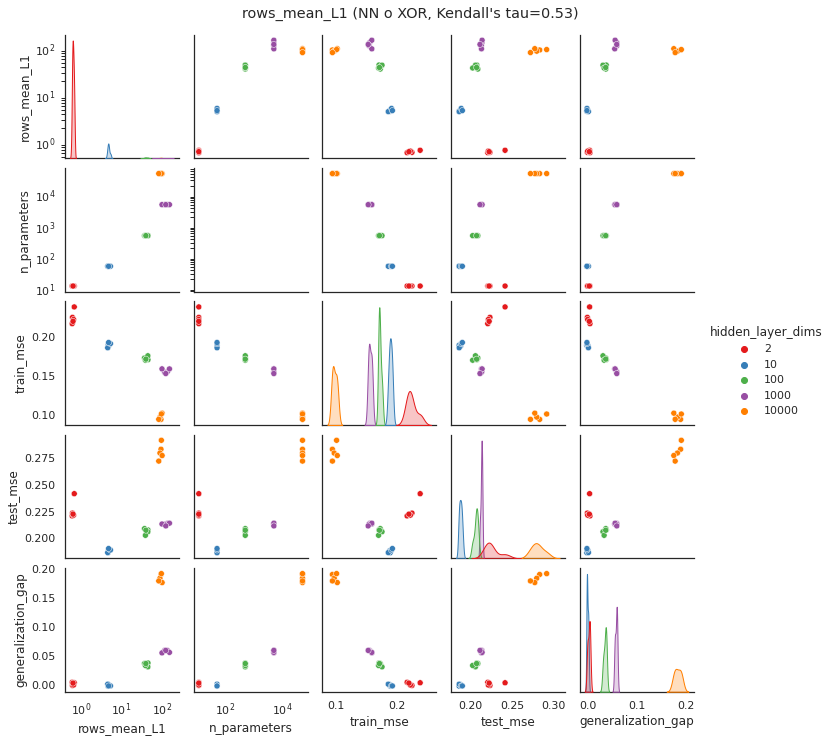

rows_mean_L2
##################################################


/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


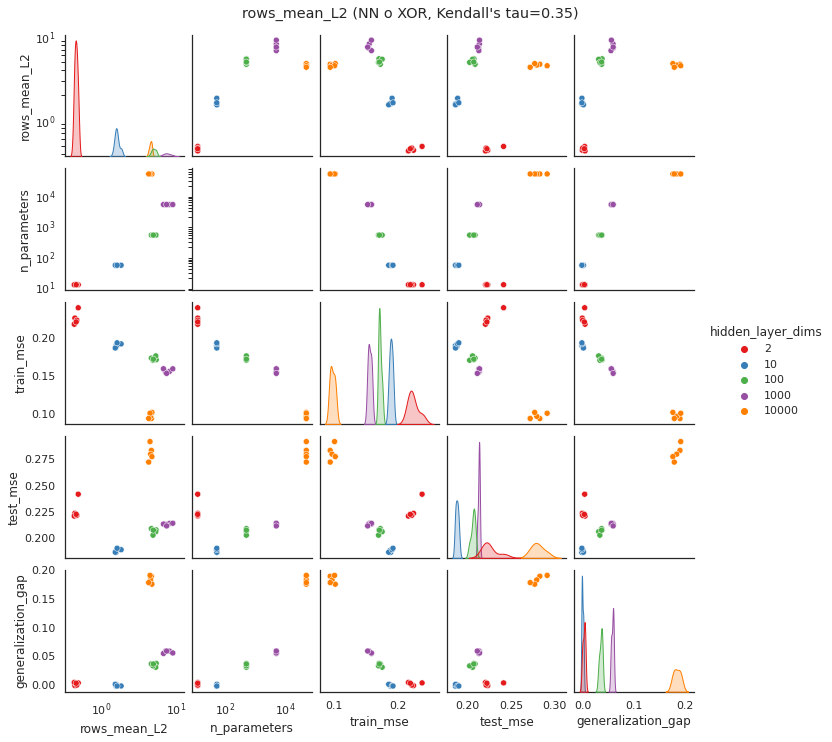

cols_mean_L1
##################################################


/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


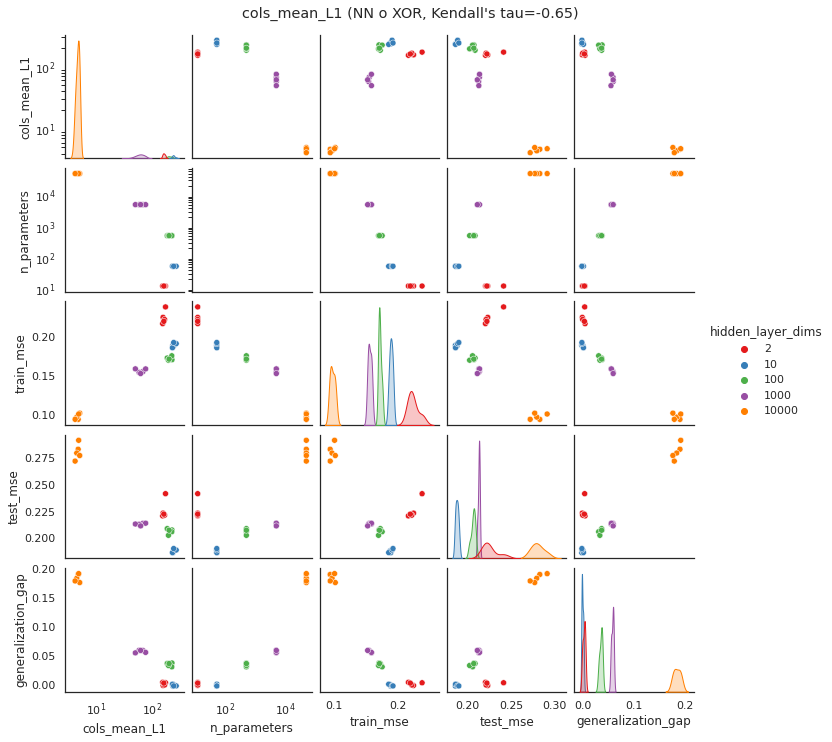

cols_mean_L2
##################################################


/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/mnt/ssd3/ronan/miniconda3/envs/proglearn/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


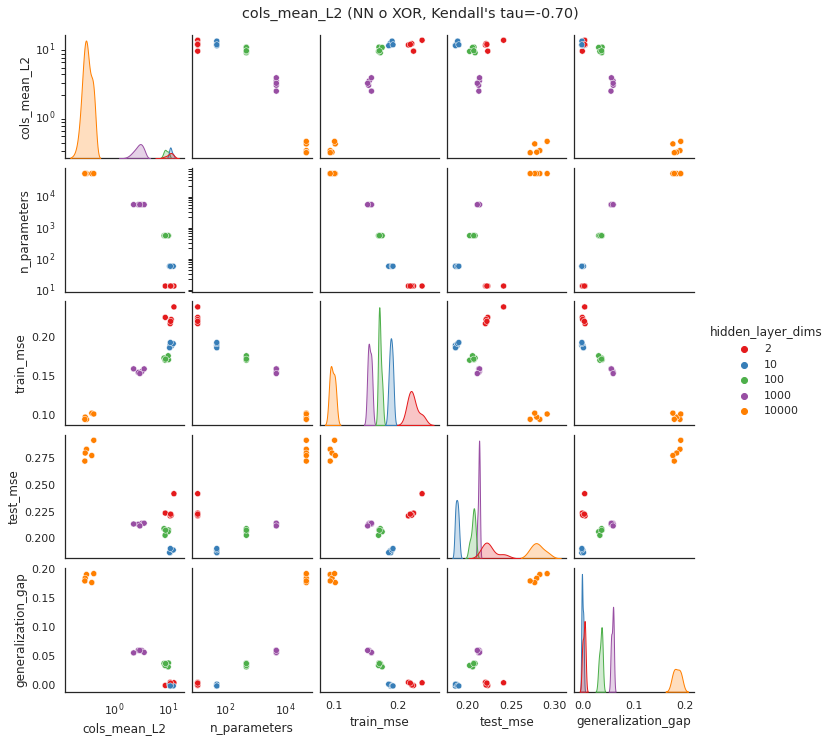

In [206]:
metrics = [
    'IRM_L1', 'IRM_L2', 'n_regions', 'ACTS_L2',
    'IRM_h*', 'ACTS_h*', # 'entropy',
    'rows_mean_L1', 'rows_mean_L2',
    'cols_mean_L1', 'cols_mean_L2',
]
hue = 'hidden_layer_dims'
for metric in metrics:
    print(metric)
    print('#'*50)
    corr, _ = kendalltau(df[metric], df['generalization_gap'])
    variables = [
        metric, 'n_parameters', train_error, test_error, 'generalization_gap'
    ]
    g = sns.pairplot(
        df, vars=variables,
        hue=hue,
        palette='Set1',
        height=2,
    )
    for ax in [0, 1]:
        g.axes[ax, 0].set_yscale('log')
        g.axes[0, ax].set_xscale('log')
    plt.suptitle(metric + f' (NN o XOR, Kendall\'s tau={corr:.2f})', y=1.02)
    # plt.savefig(f'./figures/df_{metric}_pairplot.pdf')
    plt.show()

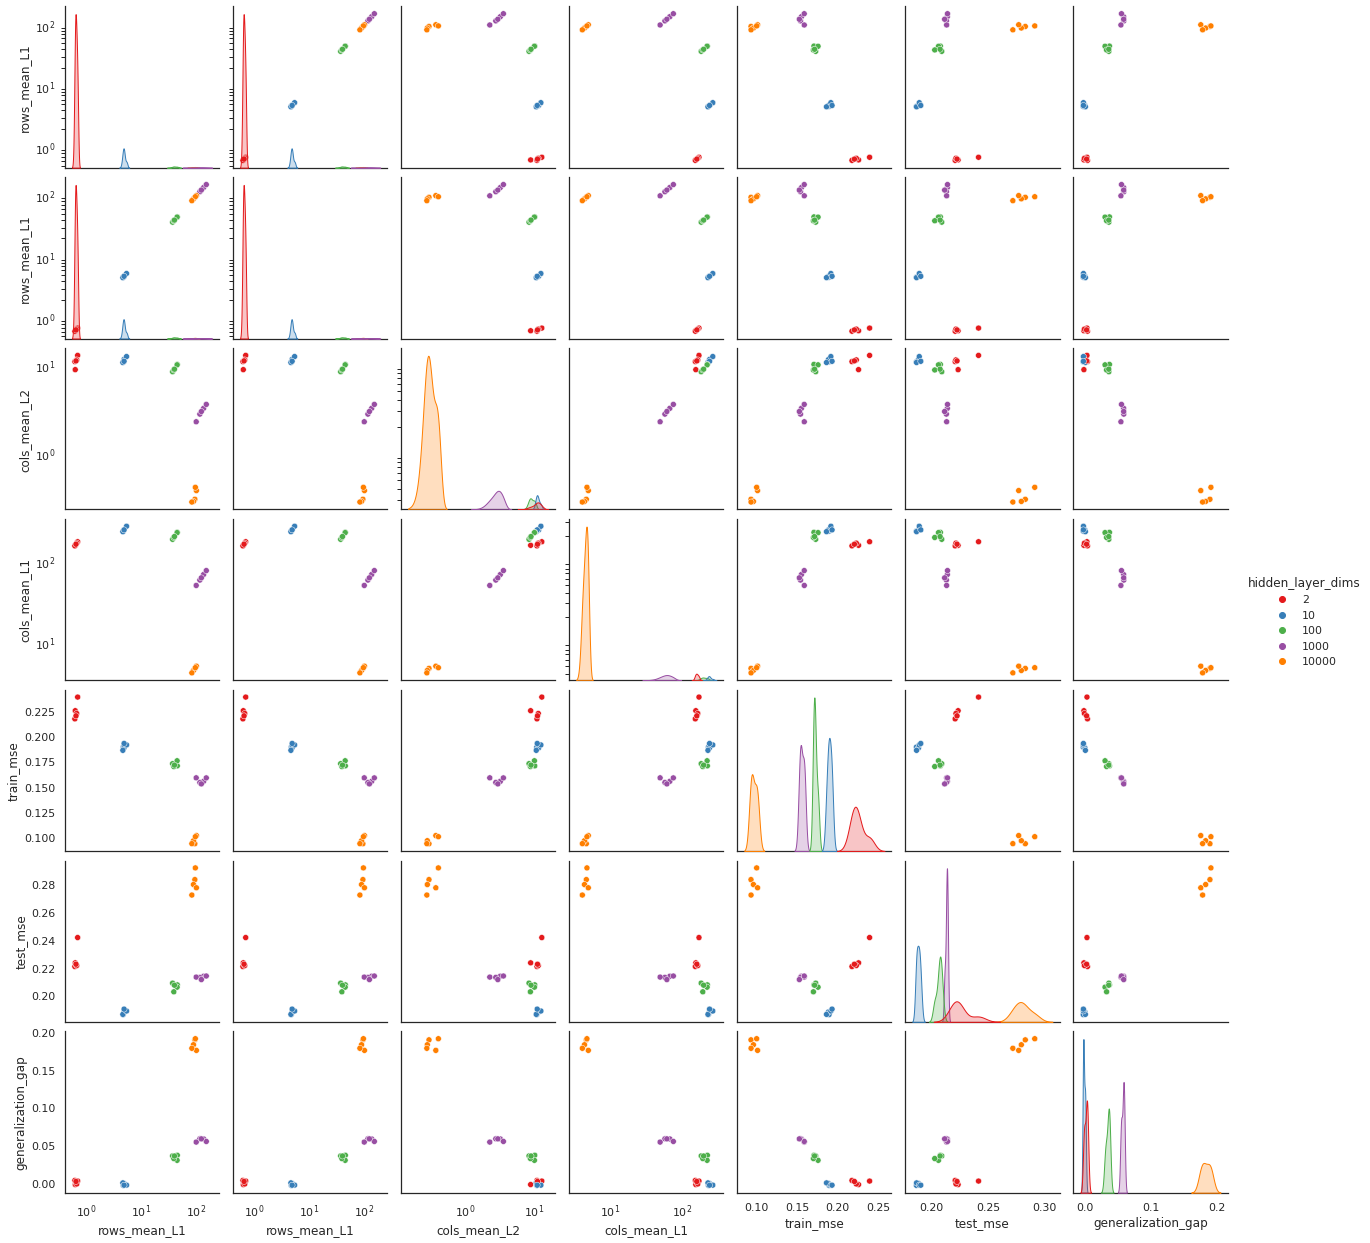

In [170]:
hue = 'hidden_layer_dims'
variables = [
    # 'n_parameters', # 'depth', 'width',
    # 'generalization_gap',
    # 'n_parameters', 'depth', 'width', 'n_epochs',
    # 'IRM_L1', 'IRM_L2', 'n_regions', 'ACTS_L2', # 'entropy',
    # 'IRM_h*', 'ACTS_h*',
    'rows_mean_L1', 'rows_mean_L1',
    'cols_mean_L2', 'cols_mean_L1',
    train_error, test_error,
    'generalization_gap',
    # 'n_epochs',
]
# df_plot = df[variables + [hue]]
# df_plot[hue] = np.log(df_plot[hue])
g = sns.pairplot(
    df, vars=variables,
    hue=hue, palette='Set1',
)
for axis in [0, 1, 2, 3]:
    g.axes[axis, 0].set_yscale('log')
    g.axes[0, axis].set_xscale('log')
plt.show()